In [4]:
import yfinance as yf

In [13]:
import yfinance as yf
import pandas as pd
# lấy mã cổ phiếu apple , max là lấy từ đầu tiên tới hiện tại
ticker = yf.Ticker("AAPL")
data = ticker.history(period="max")



In [14]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.00,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.00,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.00,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.00,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.00,0.0
...,...,...,...,...,...,...,...
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,0.00,0.0
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,0.00,0.0
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,0.00,0.0


<Axes: xlabel='Date'>

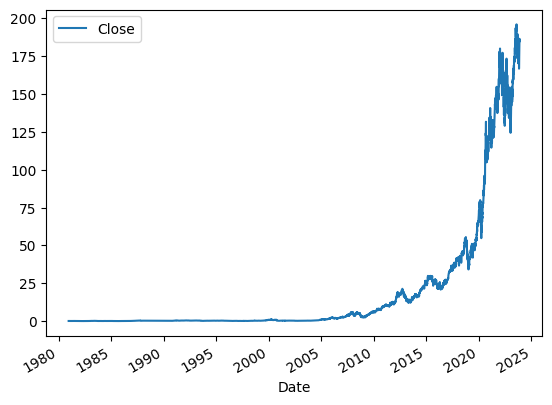

In [15]:
#biểu đồ giá đóng cửa theo từng năm
data.plot.line(y="Close", use_index=True)

In [21]:
# xóa các cột dư thừa 
columns_to_delete = ['Dividends', 'Stock Splits']

for column in columns_to_delete:
    if column in data.columns:
        del data[column]

data

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600
...,...,...,...,...,...
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500


In [23]:
#thêm một cột dữ liệu vào ngày mai dùng để dự đoán giá cổ phiếu, shift(-1)dịch giá trị lên một cột
data["Tomorrow"] = data["Close"].shift(-1)
data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097591
...,...,...,...,...,...,...
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,182.649368
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,182.169998
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,186.399994


In [25]:
#Cột "Target" bây giờ chứa giá trị nhị phân: 1 nếu giá đóng cửa của ngày hôm sau lớn hơn giá đóng cửa của ngày hiện tại, và 0 nếu ngược lại.
data["Target"] = (data["Tomorrow"] > data["Close"]).astype(int)
data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137,0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228,0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387,1
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978,1
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097591,1
...,...,...,...,...,...,...,...
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,182.649368,1
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,182.169998,0
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,186.399994,1


In [30]:
#chỉ giữ lại các dòng từ "2010-01-01" trở đi , 
# sử dụng một bản sao của dữ liệu này cho các phân tích hoặc xử lý tiếp theo mà không ảnh hưởng đến dữ liệu gốc.
data_copy = data.loc["2010-1-1":].copy()
data_copy

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.461438,6.493831,6.429650,6.478997,493729600,6.490199,1
2010-01-05 00:00:00-05:00,6.496860,6.526831,6.455989,6.490199,601904800,6.386964,0
2010-01-06 00:00:00-05:00,6.490200,6.515933,6.380304,6.386964,552160000,6.375157,0
2010-01-07 00:00:00-05:00,6.410578,6.418147,6.328837,6.375157,477131200,6.417542,1
2010-01-08 00:00:00-05:00,6.366681,6.418148,6.329142,6.417542,447610800,6.360929,0
...,...,...,...,...,...,...,...
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,182.649368,1
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,182.169998,0
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,186.399994,1


In [31]:
data_copy.to_csv('data_copy.csv')